In [57]:
import pandas as pd
import numpy as np
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from quantile_norm import *

raw_data = pd.read_csv('rna_data.csv', header=0, low_memory=False)
DEGs = list()
N = len(raw_data)
alpha = 0.05

# Normalization

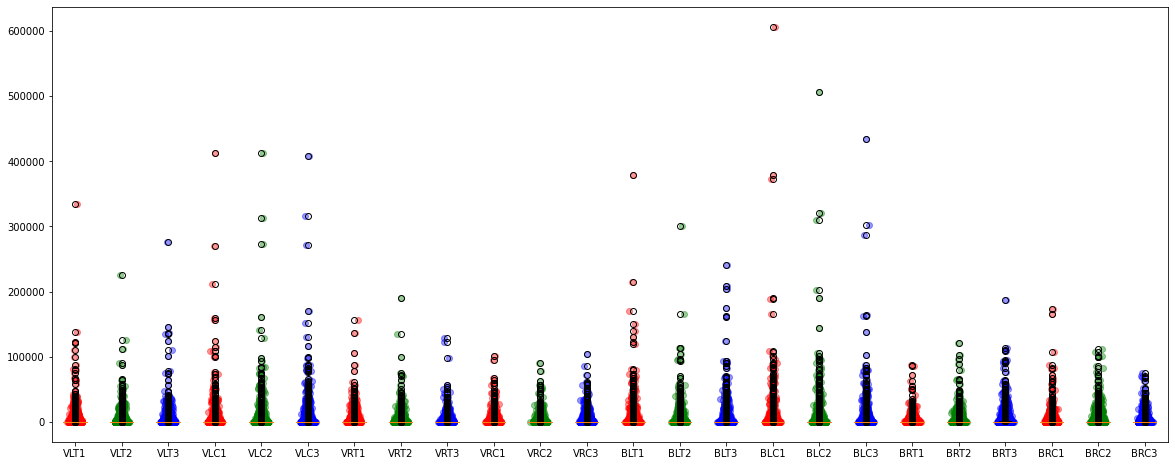

In [58]:
#graph before normalization
vals, names, xs = [],[],[]
for i, col in enumerate(raw_data[['VLT1','VLT2','VLT3','VLC1','VLC2','VLC3','VRT1','VRT2','VRT3','VRC1','VRC2','VRC3','BLT1','BLT2','BLT3','BLC1','BLC2','BLC3','BRT1','BRT2','BRT3','BRC1','BRC2','BRC3']]):
    vals.append(raw_data[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, raw_data[col].values.shape[0]))

color_list = ['r','g', 'b'] * 8
plt.figure(figsize=(20,8))
plt.boxplot(vals, labels=names)
for x, val, c in zip(xs, vals, color_list):
    plt.scatter(x, val, alpha=0.4, color = c)
plt.show()

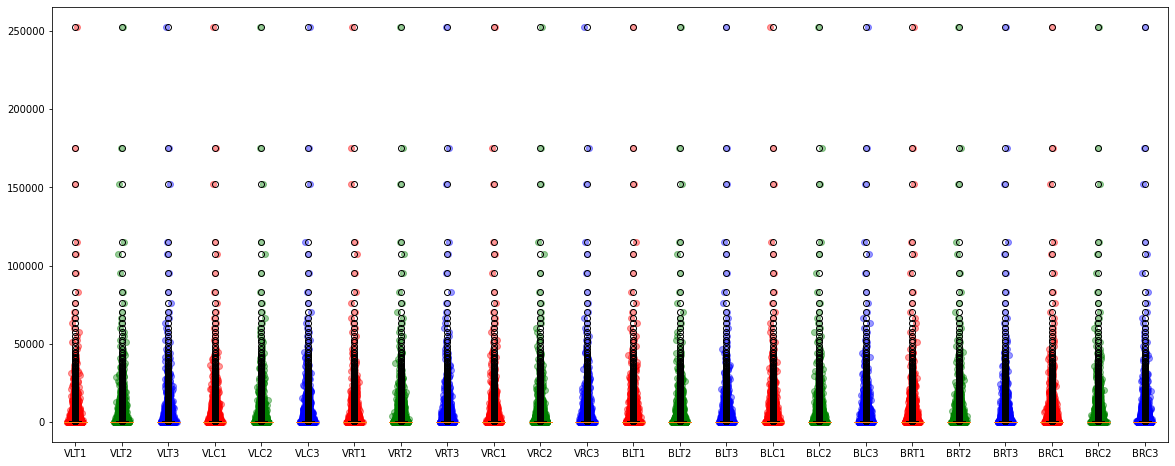

In [59]:
# normalization
GenIDs = raw_data['GenID']
raw_data = quantileNormalize(raw_data)
raw_data['GenID'] = GenIDs
raw_data

#graph After normalization
vals, names, xs = [],[],[]
for i, col in enumerate(raw_data[['VLT1','VLT2','VLT3','VLC1','VLC2','VLC3','VRT1','VRT2','VRT3','VRC1','VRC2','VRC3','BLT1','BLT2','BLT3','BLC1','BLC2','BLC3','BRT1','BRT2','BRT3','BRC1','BRC2','BRC3']]):
    vals.append(raw_data[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, raw_data[col].values.shape[0]))

color_list = ['r','g', 'b','r','g', 'b'] * 4
plt.figure(figsize=(20,8))
plt.boxplot(vals, labels=names)
for x, val, c in zip(xs, vals, color_list):
    plt.scatter(x, val, alpha=0.4, color = c)
plt.show()

# VLT vs VLC Comparison

In [62]:
df = raw_data[['GenID','VLT1','VLT2','VLT3','VLC1','VLC2','VLC3']]
df['p_value'] = nan

# Vialone Nano - Leaf 
data_set1 = df[['VLT1','VLT2','VLT3']].to_numpy()
data_set2 = df[['VLC1','VLC2','VLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_value'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df.sort_values("p_value")
df['rank'] = df.index + 1
df['BH_crit_value'] = (df['rank'] * alpha) / N

df = df[df['p_value'] < df['BH_crit_value']]
DEGs += df['GenID'].to_list()
df


<ipython-input-62-baa170ad71aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_value'] = nan


,GenID,VLT1,VLT2,VLT3,VLC1,VLC2,VLC3,p_value,rank,BH_crit_value
27151,Os05g49300,950.541667,934.958333,979.625000,214.416667,234.333333,236.708333,0.000001,27152,0.024329
44665,Os10g38110,4450.625000,4370.166667,4383.416667,5839.708333,5890.333333,5900.208333,0.000001,44666,0.040023
54628,Os12g29400,823.541667,776.791667,785.541667,102.583333,120.333333,113.375000,0.000001,54629,0.048950
29257,Os06g14470,650.250000,660.916667,660.958333,511.250000,513.291667,508.833333,0.000003,29258,0.026216
13618,Os03g09840,535.791667,522.958333,519.541667,310.875000,305.916667,298.875000,0.000003,13619,0.012203
...,...,...,...,...,...,...,...,...,...,...
53821,Os12g17700,3.958333,1.958333,6.208333,0.666667,0.833333,0.000000,0.047587,53822,0.048227
54044,Os12g21820,6.750000,5.125000,4.666667,0.666667,3.916667,2.375000,0.047683,54045,0.048427
54293,Os12g25090,100.958333,79.125000,59.125000,37.833333,51.500000,17.125000,0.047704,54294,0.048650
54258,Os12g24650,53.041667,118.041667,45.666667,12.458333,2.166667,6.000000,0.047871,54259,0.048618


# VRT vs VRC

In [63]:
df = raw_data[['GenID','VRT1','VRT2','VRT3','VRC1','VRC2','VRC3']]
df['p_value'] = nan

# Vialone Nano - Leaf 
data_set1 = df[['VRT1','VRT2','VRT3']].to_numpy()
data_set2 = df[['VRC1','VRC2','VRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_value'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df.sort_values("p_value")
df['rank'] = df.index + 1
df['BH_crit_value'] = (df['rank'] * alpha) / N

df = df[df['p_value'] < df['BH_crit_value']]
DEGs += df['GenID'].to_list()
df


<ipython-input-63-9de0848aa45a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_value'] = nan


,GenID,VRT1,VRT2,VRT3,VRC1,VRC2,VRC3,p_value,rank,BH_crit_value
28129,Os06g47910,65.041667,62.958333,64.416667,7.541667,9.000000,8.708333,2.087215e-07,28130,0.025206
51315,Os11g41890,1954.625000,1951.000000,1944.083333,2196.375000,2204.083333,2209.125000,7.898596e-07,51316,0.045981
29373,Os06g15910,165.291667,167.291667,164.000000,435.250000,444.791667,454.041667,9.073739e-07,29374,0.026320
31997,Os06g50650,5.416667,3.041667,7.833333,75.000000,76.291667,74.125000,1.350956e-06,31998,0.028672
29840,Os06g22410,0.000000,0.000000,0.000000,2.791667,2.958333,2.750000,1.522683e-06,29841,0.026739
...,...,...,...,...,...,...,...,...,...,...
55445,Os12g39830,185.083333,211.958333,179.541667,252.541667,315.958333,234.250000,4.767872e-02,55446,0.049682
54064,Os12g22090,693.291667,729.250000,671.625000,734.125000,765.416667,786.375000,4.771355e-02,54065,0.048444
53919,Os12g19090,113.000000,101.333333,94.958333,72.666667,84.791667,89.875000,4.823873e-02,53920,0.048315
55686,Os12g42884,31043.416667,27530.791667,31472.166667,26524.875000,26524.875000,26524.875000,4.901811e-02,55687,0.049898


# BLT vs BLC

In [64]:
#BLT1,BLT2,BLT3,BLC1,BLC2,BLC3
df = raw_data[['GenID','BLT1','BLT2','BLT3','BLC1','BLC2','BLC3']]
df['p_value'] = nan

# Vialone Nano - Leaf 
data_set1 = df[['BLT1','BLT2','BLT3']].to_numpy()
data_set2 = df[['BLC1','BLC2','BLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_value'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df.sort_values("p_value")
df['rank'] = df.index + 1
df['BH_crit_value'] = (df['rank'] * alpha) / N

df = df[df['p_value'] < df['BH_crit_value']]
DEGs += df['GenID'].to_list()
df


<ipython-input-64-946987cfdcfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_value'] = nan


,GenID,BLT1,BLT2,BLT3,BLC1,BLC2,BLC3,p_value,rank,BH_crit_value
32648,Os07g35750,40.625000,45.500000,36.125000,174.583333,168.416667,170.041667,0.000002,32649,0.029255
10882,Os02g46030,1103.416667,1087.125000,1037.250000,1821.083333,1816.833333,1813.166667,0.000003,10883,0.009752
1778,Os01g08690,128.791667,129.333333,129.083333,114.791667,115.958333,115.583333,0.000004,1779,0.001594
34328,Os07g20340,20.125000,13.916667,22.250000,119.708333,118.958333,115.583333,0.000004,34329,0.030760
34509,Os07g23640,359.916667,379.458333,364.208333,76.875000,79.625000,53.791667,0.000008,34510,0.030922
...,...,...,...,...,...,...,...,...,...,...
52553,Os12g01490,243.666667,378.291667,336.666667,206.833333,150.208333,218.166667,0.046878,52554,0.047091
54904,Os12g33130,2867.750000,3378.291667,4029.083333,2728.458333,1670.291667,1387.875000,0.047324,54905,0.049197
55397,Os12g39200,1637.750000,1440.291667,1451.791667,1177.666667,1312.416667,1346.333333,0.048130,55398,0.049639
54519,Os12g27994,799.083333,848.708333,710.791667,560.916667,680.458333,658.416667,0.048636,54520,0.048852


# BRT vs BRC

In [65]:
#BLT1,BLT2,BLT3,BLC1,BLC2,BLC3
df = raw_data[['GenID','BRT1','BRT2','BRT3','BRC1','BRC2','BRC3']]
df['p_value'] = nan

# Vialone Nano - Leaf 
data_set1 = df[['BRT1','BRT2','BRT3']].to_numpy()
data_set2 = df[['BRC1','BRC2','BRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_value'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df.sort_values("p_value")
df['rank'] = df.index + 1
df['BH_crit_value'] = (df['rank'] * alpha) / N

df = df[df['p_value'] < df['BH_crit_value']]
DEGs += df['GenID'].to_list()
df


<ipython-input-65-79b18486a6aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_value'] = nan


,GenID,BRT1,BRT2,BRT3,BRC1,BRC2,BRC3,p_value,rank,BH_crit_value
4667,Os01g50070,210.333333,208.291667,221.125000,34.375000,29.083333,39.125000,0.000003,4668,0.004183
20788,Os04g32830,130.666667,136.166667,133.333333,244.583333,253.208333,244.208333,0.000004,20789,0.018628
49126,Os11g10280,3.375000,3.166667,3.208333,0.291667,0.083333,0.000000,0.000008,49127,0.044020
1823,Os01g09252,634.375000,621.291667,623.250000,483.375000,479.291667,472.500000,0.000009,1824,0.001634
17054,Os03g58900,185.500000,179.375000,178.500000,118.500000,119.083333,118.583333,0.000009,17055,0.015282
...,...,...,...,...,...,...,...,...,...,...
53703,Os12g16250,121.416667,156.375000,128.583333,104.208333,107.666667,83.583333,0.047145,53704,0.048121
54852,Os12g32430,0.000000,0.000000,0.041667,0.291667,0.083333,0.333333,0.047421,54853,0.049151
55306,Os12g38051,10074.708333,9511.125000,9474.625000,66785.166667,151884.250000,60277.750000,0.047708,55307,0.049557
53478,Os12g13340,786.166667,896.791667,526.541667,18814.458333,9871.708333,5890.333333,0.047724,53479,0.047919
